In [2]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
data = pd.read_csv('output/clean_data_2020.csv')

In [4]:
data.head()

,EVI,TA,LST,Wind,Fire,Elevation
0,3037,5,13962,23,0,888.430303
1,2468,5,13962,23,0,851.066667
2,2468,5,13962,23,0,706.412121
3,2468,5,13962,23,0,648.927273
4,4013,5,13968,23,0,614.103030


### Degree of imbalance : Extreme < 1%

In [4]:

# Analyze class imbalance
target_column = "Fire"  
print(data[target_column].value_counts())
count_0 = data[target_column].value_counts()[0]
count_1 = data[target_column].value_counts()[1]
imbalance_ratio = count_0 / count_1
print(f"Class 0 (no wildfire): {count_0}")
print(f"Class 1 (wildfire): {count_1}")
print(f"Imbalance ratio: {imbalance_ratio:.3f} : 1")
print('Proportion of Minority Class:', "{:.2f}%".format(count_1 / count_0 * 100))


Fire
0    97938641
1       70611
Name: count, dtype: int64
Class 0 (no wildfire): 97938641
Class 1 (wildfire): 70611
Imbalance ratio: 1387.017 : 1
Proportion of Minority Class: 0.07%


### Splitting Data & Scaling Data

In [5]:
# Getting the X & Y
X = data.drop(columns=['Fire']).values
Y = data['Fire'].values
    
# Labeling the variables
scale = StandardScaler()
X = scale.fit_transform(X) 

In [6]:
# 60% training 20% testing 20% validatio           
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

# 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 16) 

### Fixing the Imbalanced Data

#### Under Sampler 1:1 Ratio

In [7]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# 1 means the majority class will be 1 times the size of minority class
undersample_ratio = 1

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_1_1, y_train_1_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_1_1)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 42506, 1: 42506})


#### Under Sampler 2:1 Ratio (class 0 two times the size of class 1)

In [8]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# 0.5 means the majority class will be 2 times the size of minority class
undersample_ratio = 0.5

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_2_1, y_train_2_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_2_1)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 85012, 1: 42506})


#### Under Sampler 4:1 Ratio (class 0 four times the size of class 1)

In [9]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# 0.25 means the majority class will be 4 times the size of minority class
undersample_ratio = 0.25

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_4_1, y_train_4_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_4_1)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 170024, 1: 42506})


#### Under Sampler 8:1 Ratio (class 0 eight times the size of class 1)

In [10]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# 0.125 means the majority class will be 8 times the size of minority class
undersample_ratio = 0.125

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_8_1, y_train_8_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_8_1)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 340048, 1: 42506})


### Oversamling Data

#### SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 58763044, 1: 58763044})


In [7]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling_ratio = 0.1
# 0.1 means the majority class will be 10 times the size of minority class

undersample_ratio = 0.5
# 0.5 means the majority class will be 2 times the size of minority class

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
over = SMOTE(sampling_strategy=oversampling_ratio, n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_smote_2_1, y_train_smote_2_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_smote_2_1)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({0: 11752608, 1: 5876304})


#### ADASYN Technique

In [21]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130, n_jobs=-1)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 58763044, 1: 42506})
After Counter({1: 58776182, 0: 58763044})


### Models

In [9]:
# Confusion Matrix Meathod
def confusion_matrix_build(y_test, predicted, model_name):
    NB_cm = confusion_matrix(y_test, predicted)
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    NB_cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(NB_cm,annot=labels,fmt='')
    plt.title(model_name)
    plt.ylabel('True label',fontweight='bold')
    plt.xlabel('Predicted label',fontweight='bold')


def evaluation_report(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob = clf_model.predict_proba(X_test)
    y_pred = clf_model.predict(X_test)

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test, y_pred), "\n")
    
    print('AUC-ROC')
    print('='*60)
    auc_roc = roc_auc_score(y_test, y_prob[:, 1])
    print(auc_roc)
    print('='*60)
    
    print('Confusion Matrix')
    confusion_matrix_build(y_test, y_pred, f"{algo}{sampling}")

### Gaussian Naive Bayes

#### Gaussian Naive Bayes Original data

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  19587831
           1       0.00      0.00      0.00     14020

    accuracy                           1.00  19601851
   macro avg       0.50      0.50      0.50  19601851
weighted avg       1.00      1.00      1.00  19601851
 

AUC-ROC
0.8854144679227027
Confusion Matrix


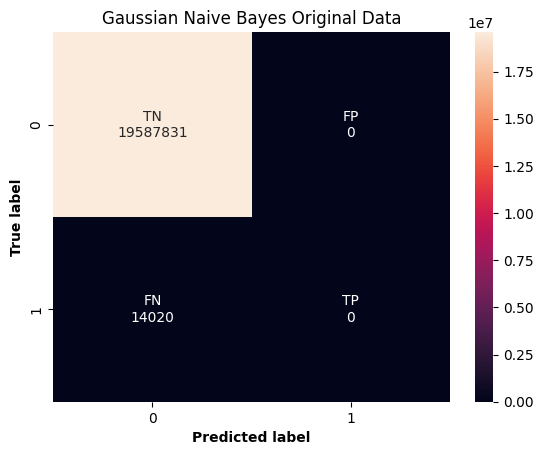

In [16]:
NB= GaussianNB(var_smoothing= 1e-09)
NB.fit(X_train, y_train)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', ' Original Data')

#### Gaussian Naive Bayes ratio 1:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.59      0.74  19587831
           1       0.00      0.97      0.00     14020

    accuracy                           0.59  19601851
   macro avg       0.50      0.78      0.37  19601851
weighted avg       1.00      0.59      0.74  19601851
 

AUC-ROC
0.8852361874584991
Confusion Matrix


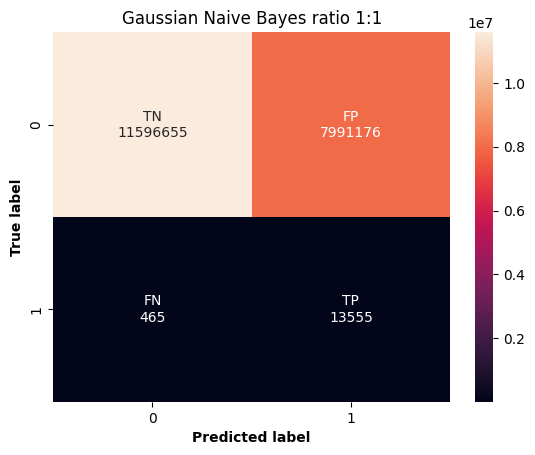

In [18]:
NB1 = GaussianNB(var_smoothing= 1e-09)
NB1.fit(X_train_1_1, y_train_1_1)

evaluation_report(NB1, X_test, y_test, 'Gaussian Naive Bayes', ' ratio 1:1')

#### Gaussian Naive Bayes ratio 2:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.65      0.79  19587831
           1       0.00      0.93      0.00     14020

    accuracy                           0.65  19601851
   macro avg       0.50      0.79      0.40  19601851
weighted avg       1.00      0.65      0.79  19601851
 

AUC-ROC
0.8853321204116479
Confusion Matrix


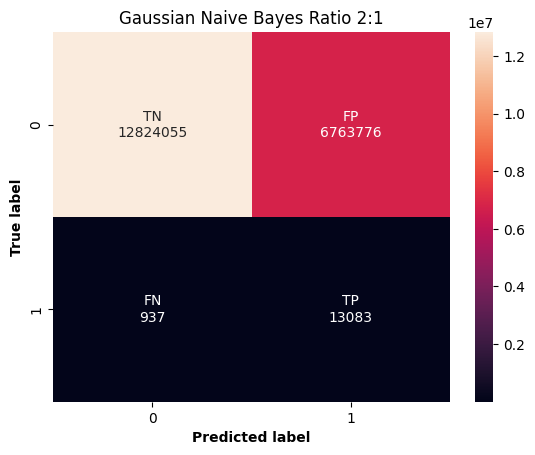

In [19]:
NB2 = GaussianNB(var_smoothing= 1e-09)
NB2.fit(X_train_2_1, y_train_2_1)

evaluation_report(NB2, X_test, y_test, 'Gaussian Naive Bayes', ' Ratio 2:1')

#### Gaussian Naive Bayes ratio 4:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84  19587831
           1       0.00      0.89      0.00     14020

    accuracy                           0.73  19601851
   macro avg       0.50      0.81      0.42  19601851
weighted avg       1.00      0.73      0.84  19601851
 

AUC-ROC
0.8854837612794839
Confusion Matrix


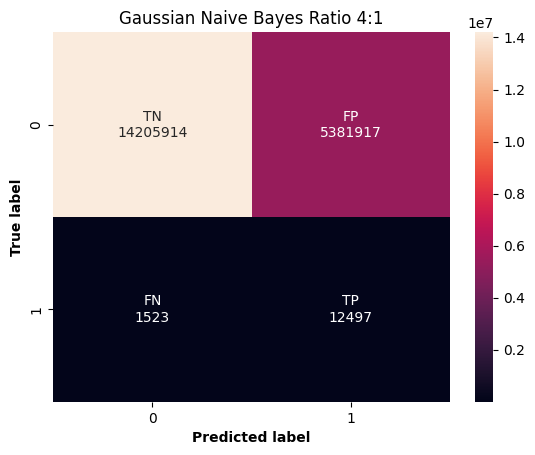

In [20]:
NB4 = GaussianNB(var_smoothing= 1e-09)
NB4.fit(X_train_4_1, y_train_4_1)

evaluation_report(NB4, X_test, y_test, 'Gaussian Naive Bayes', ' Ratio 4:1')

#### Gaussian Naive Bayes ratio 8:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89  19587831
           1       0.00      0.82      0.01     14020

    accuracy                           0.80  19601851
   macro avg       0.50      0.81      0.45  19601851
weighted avg       1.00      0.80      0.89  19601851
 

AUC-ROC
0.8853596889269151
Confusion Matrix


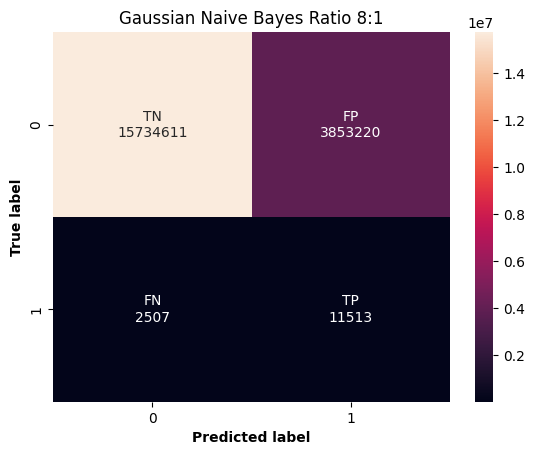

In [21]:
NB8 = GaussianNB(var_smoothing= 1e-09)
NB8.fit(X_train_8_1, y_train_8_1)

evaluation_report(NB8, X_test, y_test, 'Gaussian Naive Bayes', ' Ratio 8:1')

#### Gaussian Naive Bayes SMOTE oversampling

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.59      0.74  19587831
           1       0.00      0.97      0.00     14020

    accuracy                           0.59  19601851
   macro avg       0.50      0.78      0.37  19601851
weighted avg       1.00      0.59      0.74  19601851
 

AUC-ROC
0.8854224909175431
Confusion Matrix


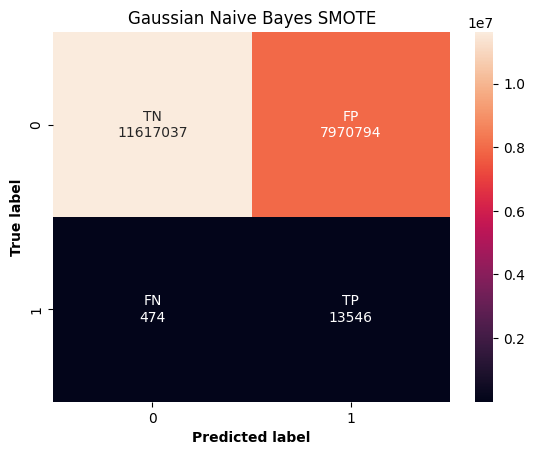

In [22]:
NB_s = GaussianNB(var_smoothing= 1e-09)
NB_s.fit(X_train_sm, y_train_sm)

evaluation_report(NB_s, X_test, y_test, 'Gaussian Naive Bayes', ' SMOTE')

#### Gaussian Naive Bayes ADASYN Technique

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.59      0.74  19587831
           1       0.00      0.96      0.00     14020

    accuracy                           0.59  19601851
   macro avg       0.50      0.78      0.37  19601851
weighted avg       1.00      0.59      0.74  19601851
 

AUC-ROC
0.8849419081788785
Confusion Matrix


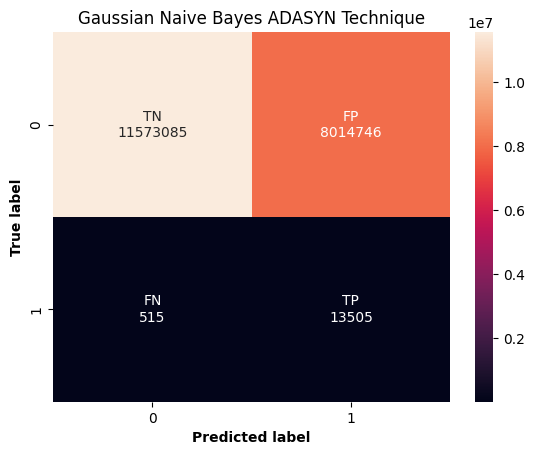

In [23]:
NB_ada = GaussianNB(var_smoothing= 1e-09)
NB_ada.fit(X_train_ada, y_train_ada)

evaluation_report(NB_ada, X_test, y_test, 'Gaussian Naive Bayes', ' ADASYN Technique')

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.66      0.79  19587831
           1       0.00      0.93      0.00     14020

    accuracy                           0.66  19601851
   macro avg       0.50      0.79      0.40  19601851
weighted avg       1.00      0.66      0.79  19601851
 

AUC-ROC
0.8853914670123012
Confusion Matrix


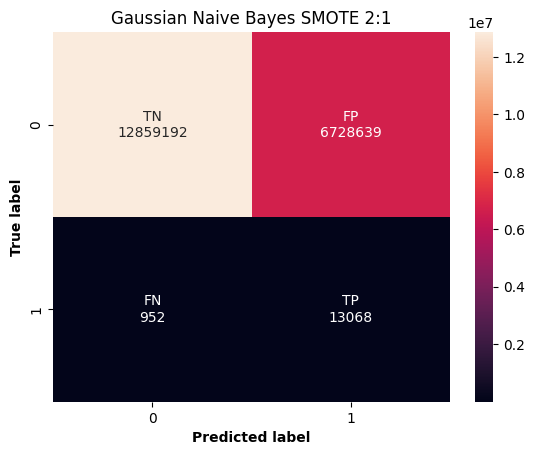

In [10]:

NB_smote2_1 = GaussianNB(var_smoothing= 1e-09)
NB_smote2_1.fit(X_train_smote_2_1, y_train_smote_2_1)

evaluation_report(NB_smote2_1, X_test, y_test, 'Gaussian Naive Bayes', ' SMOTE 2:1')

### K - Nearest Neighbors

#### K - Nearest Neighbors ratio 1:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.84      0.91  19587831
           1       0.00      0.96      0.01     14020

    accuracy                           0.84  19601851
   macro avg       0.50      0.90      0.46  19601851
weighted avg       1.00      0.84      0.91  19601851
 

AUC-ROC
0.9559520764890517
Confusion Matrix


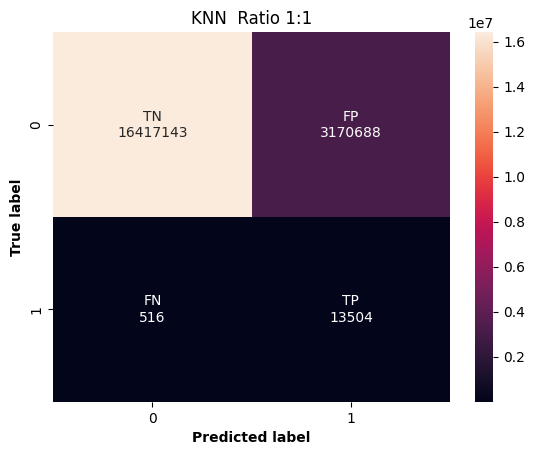

In [24]:
KNN = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights='uniform', n_jobs=-1) 
KNN.fit(X_train_1_1, y_train_1_1)

evaluation_report(KNN, X_test, y_test, 'KNN ', ' Ratio 1:1')

#### K - Nearest Neighbors ratio 8:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98  19587831
           1       0.01      0.72      0.03     14020

    accuracy                           0.96  19601851
   macro avg       0.51      0.84      0.50  19601851
weighted avg       1.00      0.96      0.98  19601851
 

AUC-ROC
0.9621057516404472
Confusion Matrix


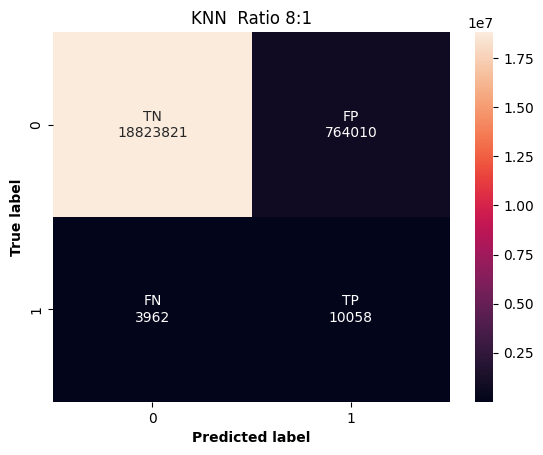

In [25]:
KNN_8 = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights='uniform', n_jobs=-1) 
KNN_8.fit(X_train_8_1, y_train_8_1)

evaluation_report(KNN_8, X_test, y_test, 'KNN ', ' Ratio 8:1')

### Suport Vector Machine

In [26]:
# Fitting Kernel SVM to the Training set                            
SVM = SVC(C= 10, gamma= 'scale', kernel= 'rbf')
SVM.fit(X_train_8_1, y_train_8_1)

#Predicting the Test Set
SVM_pred = SVM.predict(X_test)
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99  19587831
           1       0.01      0.45      0.02     14020

    accuracy                           0.97  19601851
   macro avg       0.51      0.71      0.50  19601851
weighted avg       1.00      0.97      0.99  19601851



Text(0.5, 23.52222222222222, 'Predicted label')

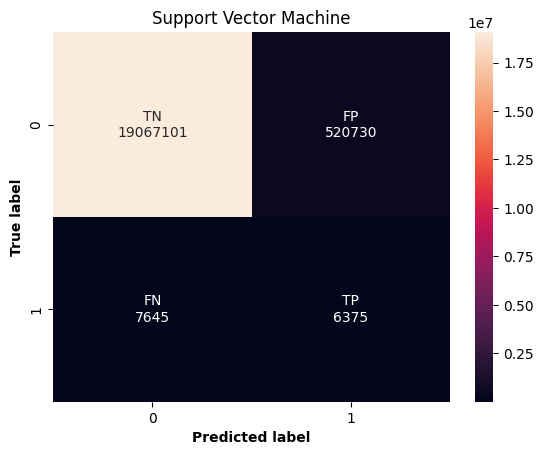

In [29]:
#making confusing matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                SVM_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(SVM_cm,annot=labels,fmt='')
plt.title('Support Vector Machine')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

### MLP

#### using gpu

In [16]:
import GPUtil

# Get a list of all available GPUs
gpus = GPUtil.getGPUs()

if len(gpus) > 0:
    print("Available GPU(s) found:")
    for gpu in gpus:
        print("GPU ID:", gpu.id)
        print("GPU Name:", gpu.name)
        print("GPU UUID:", gpu.uuid)
        print("GPU Utilization:", gpu.load * 100, "%")
        print("GPU Free Memory:", gpu.memoryFree, "MB")
else:
    print("No GPU available.")



ValueError: invalid literal for int() with base 10: 'Failed to initialize NVML: Driver/library version mismatch'

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

mlp.fit(X_train_8_1, y_train_8_1)

NN_pred_train = mlp.predict(X_train)
NN_pred_test = mlp.predict(X_test)
print(classification_report(y_test,NN_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98  19587831
           1       0.01      0.43      0.02     14020

    accuracy                           0.97  19601851
   macro avg       0.50      0.70      0.50  19601851
weighted avg       1.00      0.97      0.98  19601851



In [17]:
from sklearn.neural_network import MLPClassifier

mlp_smote = MLPClassifier(hidden_layer_sizes=(8,8,8,8,8,8), activation='relu', solver='adam', max_iter=500)

mlp_smote.fit(X_train_smote_2_1, y_train_smote_2_1)

NN_pred_train = mlp_smote.predict(X_train)
NN_pred_test = mlp_smote.predict(X_test)
print(classification_report(y_test,NN_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94  19587831
           1       0.01      0.87      0.01     14020

    accuracy                           0.89  19601851
   macro avg       0.50      0.88      0.48  19601851
weighted avg       1.00      0.89      0.94  19601851



Text(0.5, 23.52222222222222, 'Predicted label')

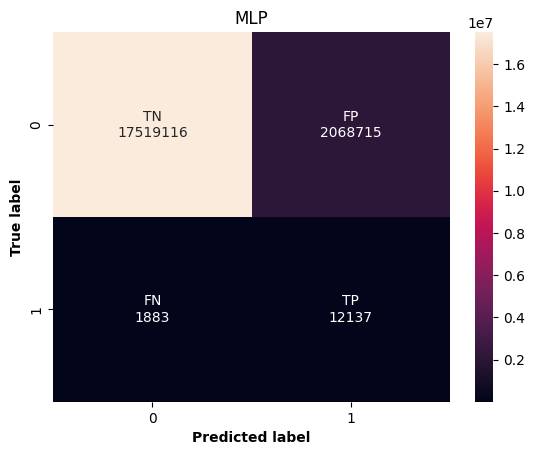

In [19]:
#making confusing matrix
NN_cm = confusion_matrix(y_test, NN_pred_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                NN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NN_cm,annot=labels,fmt='')
plt.title('MLP')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (128,)],  # Adjust the number of neurons in the hidden layer
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'max_iter': [200, 500, 1000]  # Maximum number of iterations
}

# Initialize the MLPClassifier
mlp = MLPClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_8_1, y_train_8_1)

# Get the best parameters and best precision score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

# Print the best parameters and precision score
print("Best Parameters:", best_params)
print("Best Precision:", best_precision)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
NN_pred_test = best_model.predict(X_test)

# Evaluate the performance on the test set
print("Classification Report:")
print(classification_report(y_test, NN_pred_test))


/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (128,), 'max_iter': 500, 'solver': 'adam'}
Best Precision: 0.6850692352581029
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98  19587831
           1       0.01      0.54      0.02     14020

    accuracy                           0.97  19601851
   macro avg       0.51      0.75      0.50  19601851
weighted avg       1.00      0.97      0.98  19601851



In [20]:
# Fit the grid search to the data
grid_search.fit(X_train_2_1, y_train_2_1)

# Get the best parameters and best precision score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

# Print the best parameters and precision score
print("Best Parameters:", best_params)
print("Best Precision:", best_precision)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
NN_pred_test = best_model.predict(X_test)

# Evaluate the performance on the test set
print("Classification Report:")
print(classification_report(y_test, NN_pred_test))


/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/fk146086/comp491_wildfire_spring2024/COMP491/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'max_iter': 200, 'solver': 'adam'}
Best Precision: 0.8066428262852611
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95  19587831
           1       0.01      0.84      0.01     14020

    accuracy                           0.90  19601851
   macro avg       0.50      0.87      0.48  19601851
weighted avg       1.00      0.90      0.95  19601851



### LSTM

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.utils import class_weight

# Calculate class weights to handle imbalance
#class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_8_1), y=y_train_8_1)

# Reshape X_train_8_1 to have the required shape
X_train_8_1 = X_train_8_1.reshape(X_train_8_1.shape[0], X_train_8_1.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_8_1.shape[1], X_train_8_1.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_8_1, y_train_8_1, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/10
11955/11955 [==============================] - 2749s 230ms/step - loss: 0.2156 - accuracy: 0.9005 - val_loss: 0.0733 - val_accuracy: 0.9827
Epoch 2/10
11955/11955 [==============================] - 2748s 230ms/step - loss: 0.1875 - accuracy: 0.9138 - val_loss: 0.0954 - val_accuracy: 0.9635
Epoch 3/10
11955/11955 [==============================] - 2756s 231ms/step - loss: 0.1813 - accuracy: 0.9170 - val_loss: 0.0910 - val_accuracy: 0.9655
Epoch 4/10
11955/11955 [==============================] - 2749s 230ms/step - loss: 0.1773 - accuracy: 0.9185 - val_loss: 0.0817 - val_accuracy: 0.9700
Epoch 5/10
11955/11955 [==============================] - 2743s 229ms/step - loss: 0.1743 - accuracy: 0.9201 - val_loss: 0.0915 - val_accuracy: 0.9631
Epoch 6/10
11955/11955 [==============================] - 2750s 230ms/step - loss: 0.1719 - accuracy: 0.9209 - val_loss: 0.0847 - val_accuracy: 0.9655
Epoch 7/10
11955/11955 [==============================] - 2763s 231ms/step - loss: 0.1697 - ac

In [25]:

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Apply threshold to obtain predicted class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
labels = ['Class 0', 'Class 1']  # Adjust labels based on your problem
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


612558/612558 [==============================] - 2813s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98  19587831
           1       0.01      0.58      0.03     14020

    accuracy                           0.97  19601851
   macro avg       0.51      0.77      0.50  19601851
weighted avg       1.00      0.97      0.98  19601851



NameError: name 'ConfusionMatrixDisplay' is not defined

#### ratio 8:1

Epoch 1/10
11955/11955 [==============================] - 3814s 319ms/step - loss: 0.2113 - accuracy: 0.9013 - val_loss: 0.0689 - val_accuracy: 0.9826
Epoch 2/10
11955/11955 [==============================] - 3823s 320ms/step - loss: 0.1854 - accuracy: 0.9147 - val_loss: 0.0875 - val_accuracy: 0.9686
Epoch 3/10
11955/11955 [==============================] - 3849s 322ms/step - loss: 0.1791 - accuracy: 0.9177 - val_loss: 0.0835 - val_accuracy: 0.9704
Epoch 4/10
11955/11955 [==============================] - 3859s 323ms/step - loss: 0.1752 - accuracy: 0.9198 - val_loss: 0.0979 - val_accuracy: 0.9593
Epoch 5/10
11955/11955 [==============================] - 3857s 323ms/step - loss: 0.1719 - accuracy: 0.9210 - val_loss: 0.0879 - val_accuracy: 0.9629
Epoch 6/10
11955/11955 [==============================] - 3813s 319ms/step - loss: 0.1689 - accuracy: 0.9225 - val_loss: 0.0795 - val_accuracy: 0.9699
Epoch 7/10
11955/11955 [==============================] - 3829s 320ms/step - loss: 0.1660 - ac

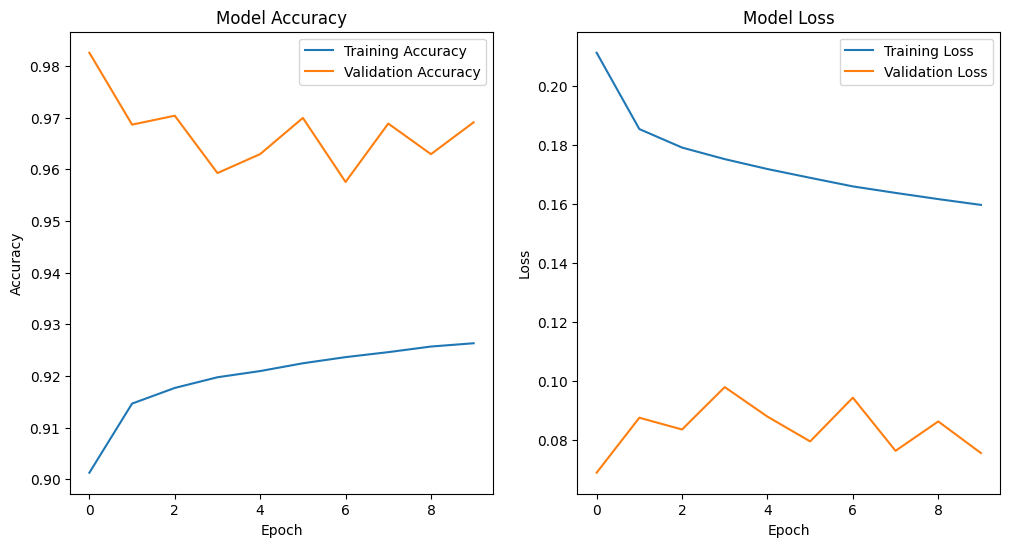

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


# Reshape X_train_8_1 to have the required shape
X_train_8_1 = X_train_8_1.reshape(X_train_8_1.shape[0], X_train_8_1.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, 
               input_shape=(X_train_8_1.shape[1], X_train_8_1.shape[2]), 
               activation='tanh', 
               ))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_8_1, y_train_8_1, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

612558/612558 [==============================] - 3813s 6ms/step


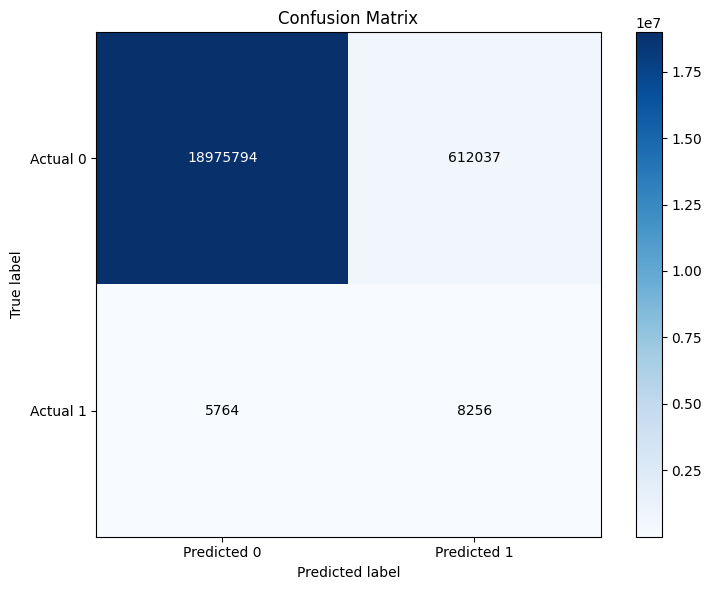

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Make predictions using the trained model on the test data
y_pred = model.predict(X_test)

# 2. Convert the predicted probabilities to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# 3. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# 4. Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

# Annotate the confusion matrix with counts
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


#### SMOTE 2:1

2024-02-14 14:45:38.298451: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 14:45:38.345782: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 14:45:38.345826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 14:45:38.347052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 14:45:38.354396: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 14:45:39.367081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

Epoch 1/10
550904/550904 [==============================] - 5034s 9ms/step - loss: 0.1966 - accuracy: 0.9185 - val_loss: 0.1317 - val_accuracy: 0.9382
Epoch 2/10
550904/550904 [==============================] - 4905s 9ms/step - loss: 0.1527 - accuracy: 0.9410 - val_loss: 0.1315 - val_accuracy: 0.9414
Epoch 3/10
550904/550904 [==============================] - 4924s 9ms/step - loss: 0.1399 - accuracy: 0.9471 - val_loss: 0.1182 - val_accuracy: 0.9473
Epoch 4/10
550904/550904 [==============================] - 4949s 9ms/step - loss: 0.1327 - accuracy: 0.9505 - val_loss: 0.1298 - val_accuracy: 0.9440
Epoch 5/10
550904/550904 [==============================] - 4916s 9ms/step - loss: 0.1279 - accuracy: 0.9529 - val_loss: 0.1131 - val_accuracy: 0.9509
Epoch 6/10
550904/550904 [==============================] - 4958s 9ms/step - loss: 0.1244 - accuracy: 0.9545 - val_loss: 0.1110 - val_accuracy: 0.9518
Epoch 7/10
550904/550904 [==============================] - 5128s 9ms/step - loss: 0.1218 - ac

NameError: name 'history' is not defined

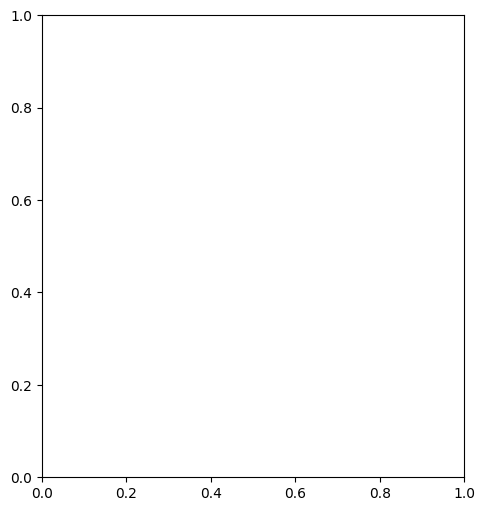

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


# Reshape X_train_8_1 to have the required shape
X_train_smote_2_1 = X_train_smote_2_1.reshape(X_train_smote_2_1.shape[0], X_train_smote_2_1.shape[1], 1)

# Define the LSTM model
model_smote = Sequential()
model_smote.add(LSTM(units=128, 
               input_shape=(X_train_smote_2_1.shape[1], X_train_smote_2_1.shape[2]), 
               activation='tanh', 
               ))
model_smote.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_smote.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_smote = model_smote.fit(X_train_smote_2_1, y_train_smote_2_1, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_smote.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict probabilities
y_pred_prob = model_smote.predict(X_test)

# Apply threshold to obtain predicted class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

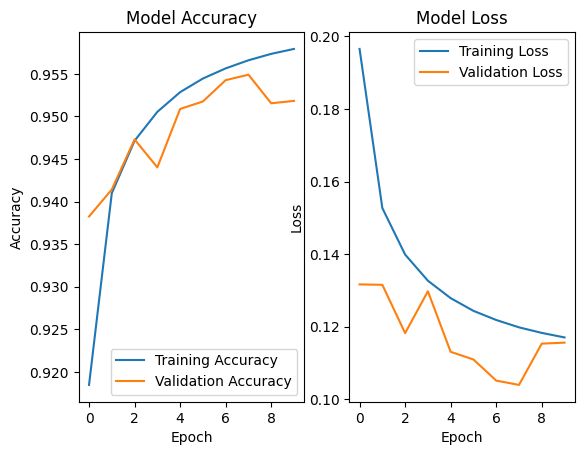

In [24]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_smote.history['accuracy'], label='Training Accuracy')
plt.plot(history_smote.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_smote.history['loss'], label='Training Loss')
plt.plot(history_smote.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

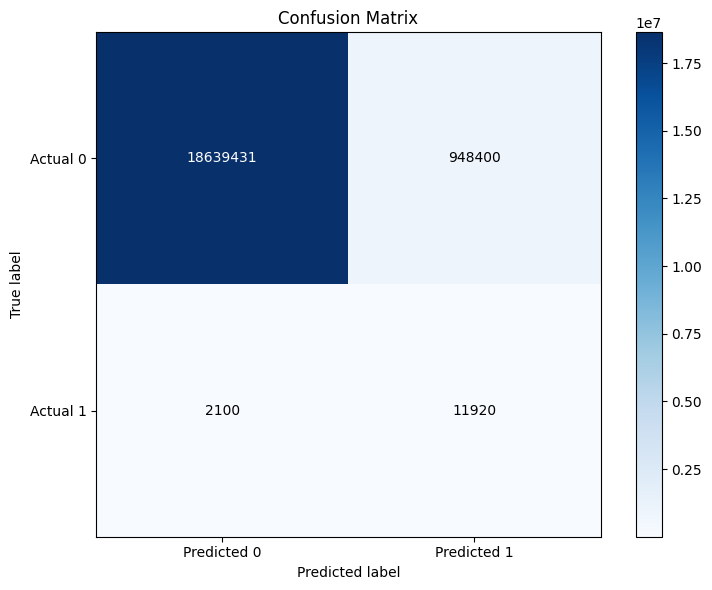

In [25]:
# 2. Convert the predicted probabilities to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# 3. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# 4. Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

# Annotate the confusion matrix with counts
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model with hyperparameters
def create_model(units=64, activation='relu', dropout_rate=0.2, l2_penalty=0.01, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(X_train_8_1.shape[1], X_train_8_1.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(l2_penalty)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters to search
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3],
    'l2_penalty': [0.01, 0.001],
    'learning_rate': [0.001, 0.0001]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='precision')
grid_result = grid_search.fit(X_train_8_1, y_train_8_1)

# Summarize results
print("Best Parameters:", grid_result.best_params_)
print("Best Precision:", grid_result.best_score_)
